# Practice Questions
## Matplotlib/Seaborn related only
##### December 3rd, 2023


## Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv('IMDB-Movie-Data.csv')

### Question 1.

**Plot a line graph showing the trend of average movie ratings over the years.**

In [5]:
result = df.groupby('Year')['Rating'].mean().reset_index()

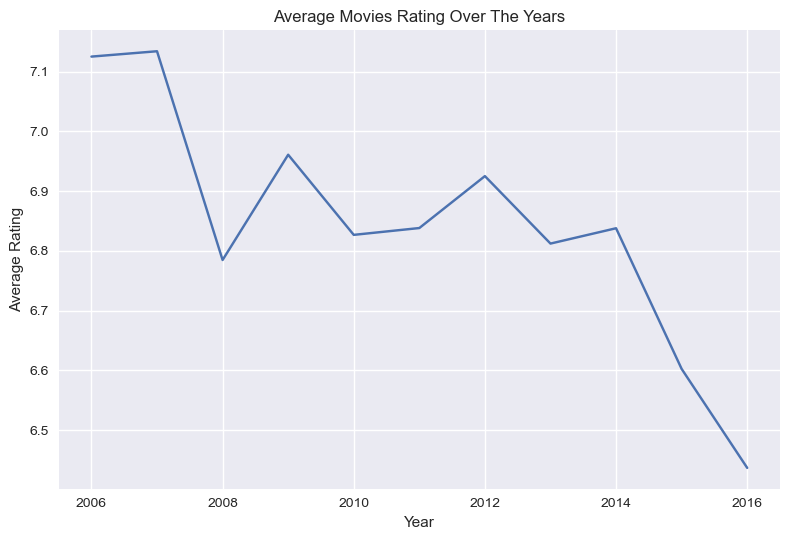

In [132]:
#plotting the graph

fig, ax = plt.subplots()

ax.plot(result['Year'], result['Rating'])
ax.set_title('Average Movies Rating Over The Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 2.

Create a bar chart showing the number of movies released each year.

In [6]:
movie_counts = df['Year'].value_counts().sort_index().reset_index()

In [7]:
#adjust the column names

movie_counts.columns = ['Year', 'Number of Movies Released']

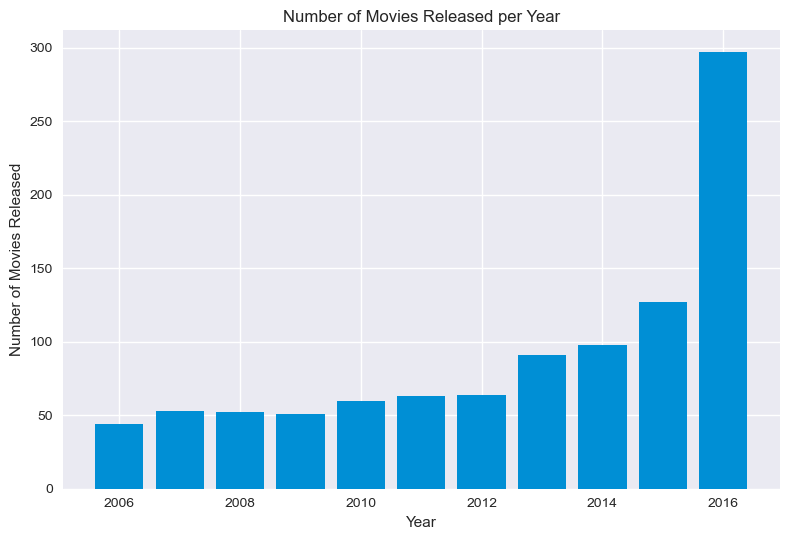

In [133]:
#plotting the graph

fig, ax = plt.subplots()

ax.bar(movie_counts['Year'], movie_counts['Number of Movies Released'], color="#008fd5")
ax.set_title('Number of Movies Released per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies Released')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 3

**Scatter Plot: Create a scatter plot to analyze the relationship between 'Rating' and 'Revenue (Millions)'.**

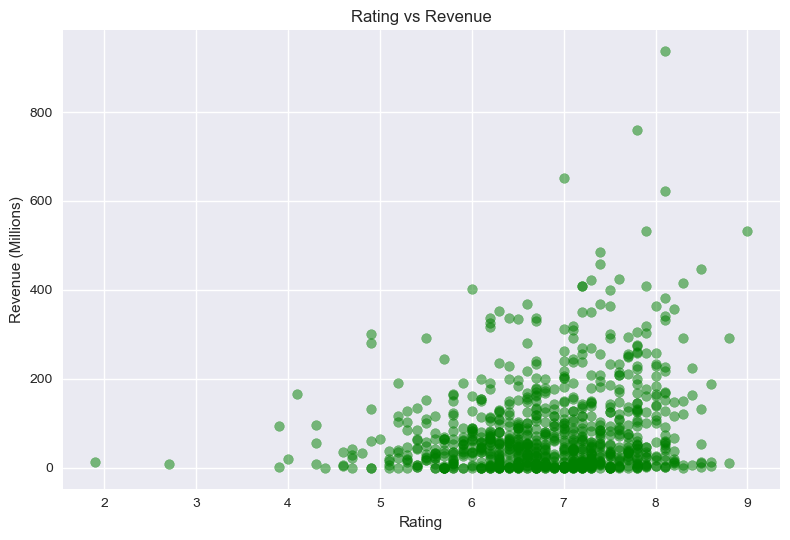

In [134]:
#plotting the graph

fig, ax = plt.subplots()

ax.scatter(df['Rating'], df['Revenue (Millions)'], alpha = 0.5, color="green")
ax.set_title('Rating vs Revenue')
ax.set_xlabel('Rating')
ax.set_ylabel('Revenue (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 4

**Pie Chart: Make a pie chart showing the proportion of movies in different genres (consider only the primary genre).**

In [8]:
# Extracting the primary genre using .str.split on ',' as the columns values are ',' separated
df['Primary Genre'] = df['Genre'].str.split(',').str[0]

# Counting the number of movies in each primary genre
genre_counts = df['Primary Genre'].value_counts()

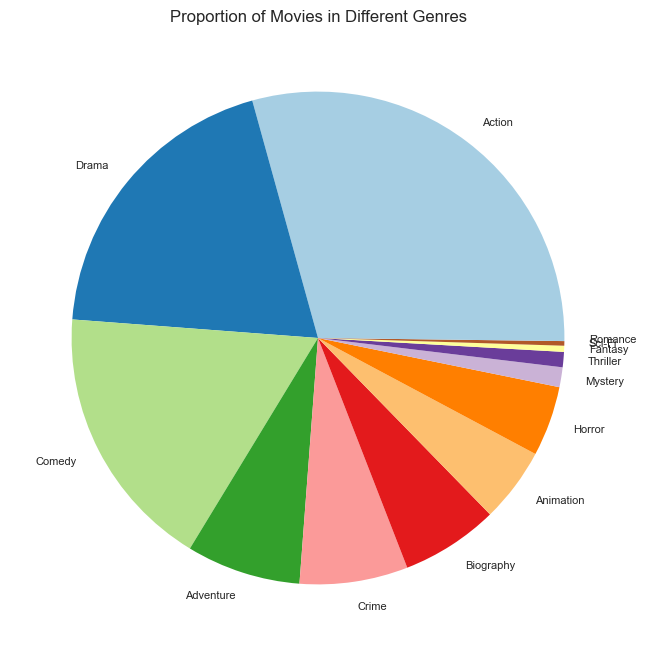

In [138]:
# plotting the pie chart

fig, ax = plt.subplots(figsize=(8,8))

ax.pie(genre_counts, labels=genre_counts.index, colors=plt.cm.Paired.colors,
       textprops={'fontsize': 8, 'fontweight': 'regular'})
ax.set_title('Proportion of Movies in Different Genres')
plt.show()

## Question 5.

**Subplots: Create subplots showing the average rating and the average revenue per year side by side.** 

In [9]:
# groupby 'Year' and calculate the average rating and revenue for each year.
average_rating_revenue = df.groupby('Year')[['Rating', 'Revenue (Millions)']].mean().reset_index()

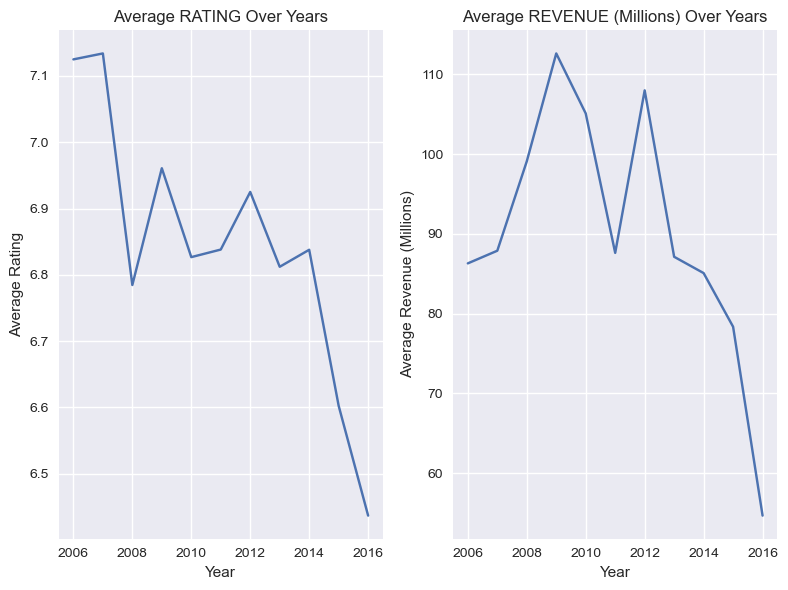

In [149]:
# creating the subplots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

# plotting average Rating
ax[0].plot(average_rating_revenue['Year'], average_rating_revenue['Rating'])
ax[0].set_title('Average RATING Over Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Rating')
ax[0].grid(True)

# plotting average Revenue (Millions)
ax[1].plot(average_rating_revenue['Year'], average_rating_revenue['Revenue (Millions)'])
ax[1].set_title('Average REVENUE (Millions) Over Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Revenue (Millions)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Question 6

**Stacked Bar Chart: Generate a stacked bar chart showing the number of movies in each genre over the years.**

In [10]:
genre_counts = df.groupby(['Year', 'Primary Genre']).size().unstack(fill_value=0)

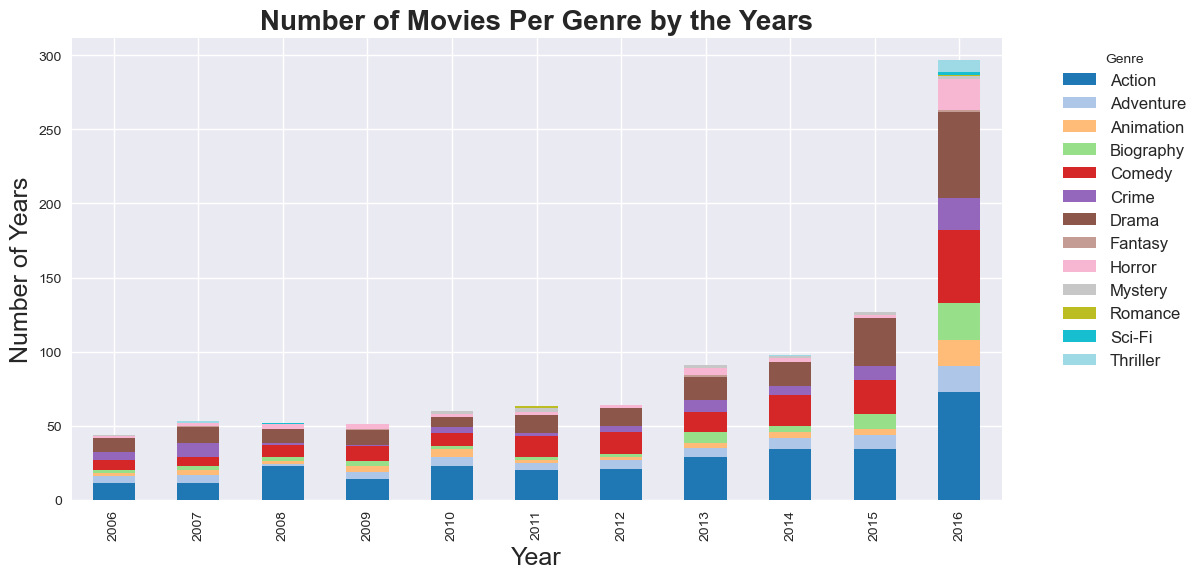

In [172]:
# create stacked bar chat

fig, ax = plt.subplots(figsize=(12,6))
genre_counts.plot(kind='bar', stacked=True, colormap= 'tab20', ax=ax)

ax.set_title('Number of Movies Per Genre by the Years', fontdict = {'fontsize' : 20,
              'fontweight' : 'bold'})

ax.set_xlabel('Year', fontdict={'fontsize' : 18})
ax.set_ylabel('Number of Years', fontdict={'fontsize' : 18})
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

### Question 7

**Create a heatmap to display the correlation between numeric columns like 'Rating', 'Revenue', and 'Metascore'.**

In [11]:
# Extract subset of numeric features, drop nulls and run corr function
df_corr = df[['Year','Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore',]].dropna().corr()

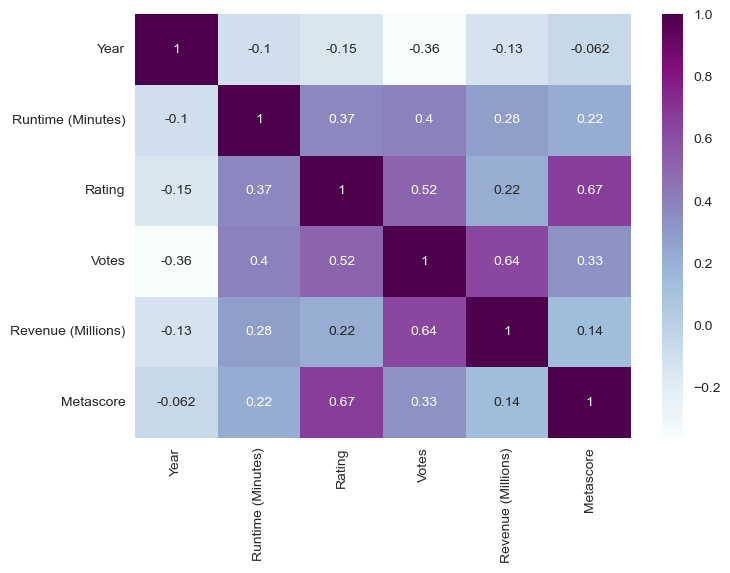

In [202]:
sns.heatmap(df_corr, annot=True, cmap="BuPu")

plt.show()
            